# Train data и начало

Подключаем библиотеки и dataset:

In [86]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Google disk

In [84]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [115]:
data = pd.read_csv("drive/MyDrive/train.csv")
X = data.iloc[:, 1:-1]
y = data['target']

# Порежем Train data если нужно

In [5]:
X = X[:50000]
y = y[:50000]

# Изучение данных

Посмотрим как выглядят данные:

In [88]:
data.sample(10)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
29586,49004,0.934821,0.106620,0.239681,0.627796,0.679478,0.826329,0.269380,0.676306,0.851378,0.857319,0.655142,0.641970,0.914831,0.271622,7.135712
163895,273045,0.513617,0.553814,0.651178,0.273608,0.284686,0.454843,0.649268,0.406040,0.430748,0.655126,0.590815,0.621971,0.291861,0.701194,8.010345
246826,411438,0.338205,0.225301,0.902941,0.212989,0.632335,0.376298,0.475778,0.352789,0.363774,0.426948,0.506308,0.532215,0.345040,0.401423,8.582352
187537,312490,0.238356,0.735451,0.624057,0.493591,0.547526,0.485173,0.515711,0.578169,0.329635,0.382199,0.403766,0.364446,0.604054,0.413842,6.913169
124882,207794,0.291187,0.684093,0.726031,0.356417,0.950005,0.365180,0.408520,0.602769,0.419286,0.548754,0.387610,0.395038,0.355296,0.339598,6.971561
241416,402405,0.495678,0.733824,0.668648,0.468957,0.284554,0.641430,0.627797,0.571826,0.404674,0.604025,0.708995,0.715249,0.777425,0.243668,8.892658
259574,432771,0.479577,0.308865,0.289943,0.470100,0.641325,0.725884,0.552551,0.328530,0.409176,0.600508,0.496672,0.619188,0.732104,0.304048,8.817806
123617,205671,0.642086,0.621602,0.731877,0.480639,0.743717,0.801258,0.528496,0.375146,0.580127,0.682012,0.415913,0.579928,0.781791,0.808236,8.503569
162895,271363,0.679546,0.359443,0.541000,0.635971,0.282121,0.455589,0.477210,0.556841,0.657695,0.474457,0.293455,0.423222,0.421308,0.627457,7.501445
241095,401892,0.616907,0.421123,0.597145,0.742447,0.422038,0.578092,0.537791,0.421315,0.494682,0.597034,0.396227,0.540554,0.357099,0.216971,7.861815


Проверим наличие дубликатов:

In [89]:
print(data.shape)
data = data.dropna()
data = data.drop_duplicates()
data.shape

(300000, 16)


(300000, 16)

Дубликатов не обнаружено.

Проверяем на наличие пропущенных данных:

In [90]:
data.isna().sum(axis=0)

id        0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
target    0
dtype: int64

Пропущенных данных не обнаружено.

Создаем гистограммы признаков и target переменной:

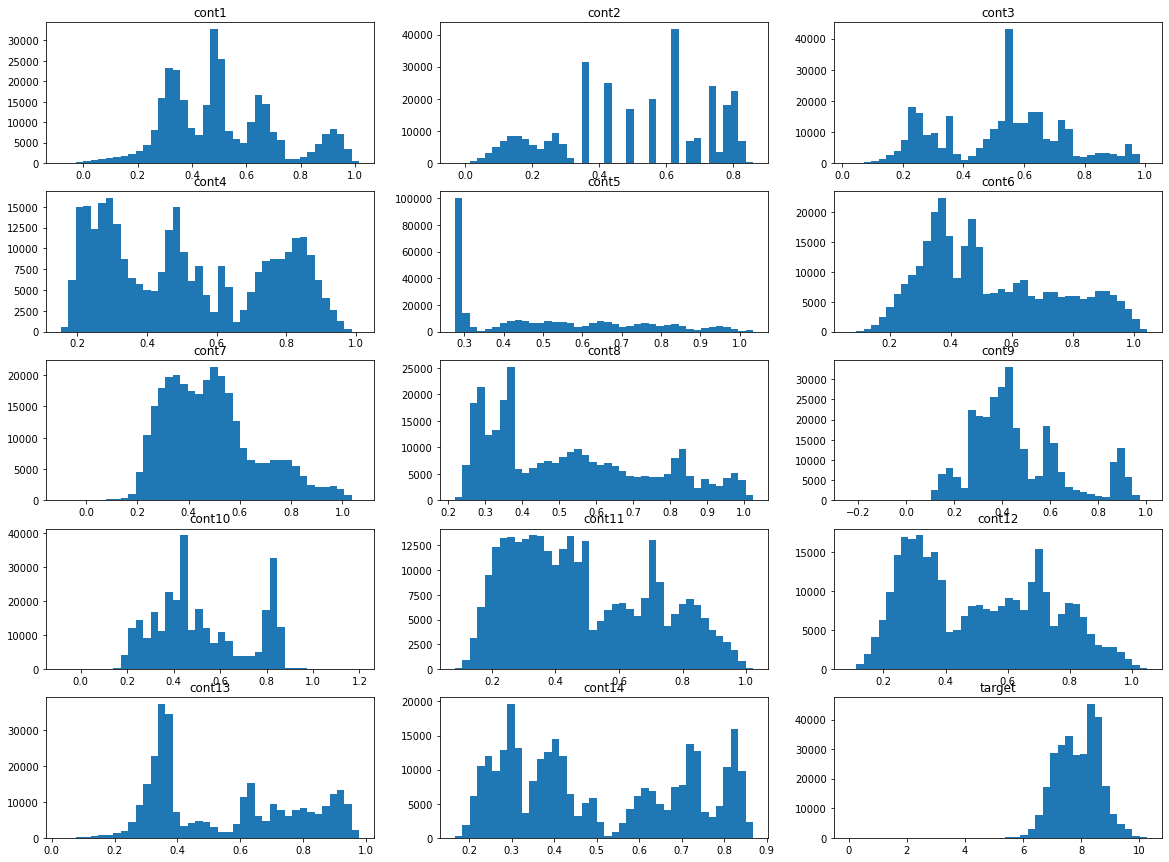

In [91]:
numerical = data.columns
numerical = numerical[1:-1]

fig, axs = plt.subplots(5, 3, figsize=(20, 15))
k=0
for i in range(5):
    for j in range (3):
        if (i==4)&(j==2):
            axs[4][2].set_title("target")
            axs[4][2].hist(data["target"], log=False, bins=40)
        else:
            col_name = numerical[k]
            axs[i][j].set_title(col_name)
            axs[i][j].hist(data[col_name], log=False, bins=40)
            k=k+1
plt.show()

Из гистограм можно заметить, что мы имеем бимодальное распределение целевой переменной и мультимодальное распределение признаков.

Теперь проверим, есть ли зрительная зависимость target переменной от признаков:

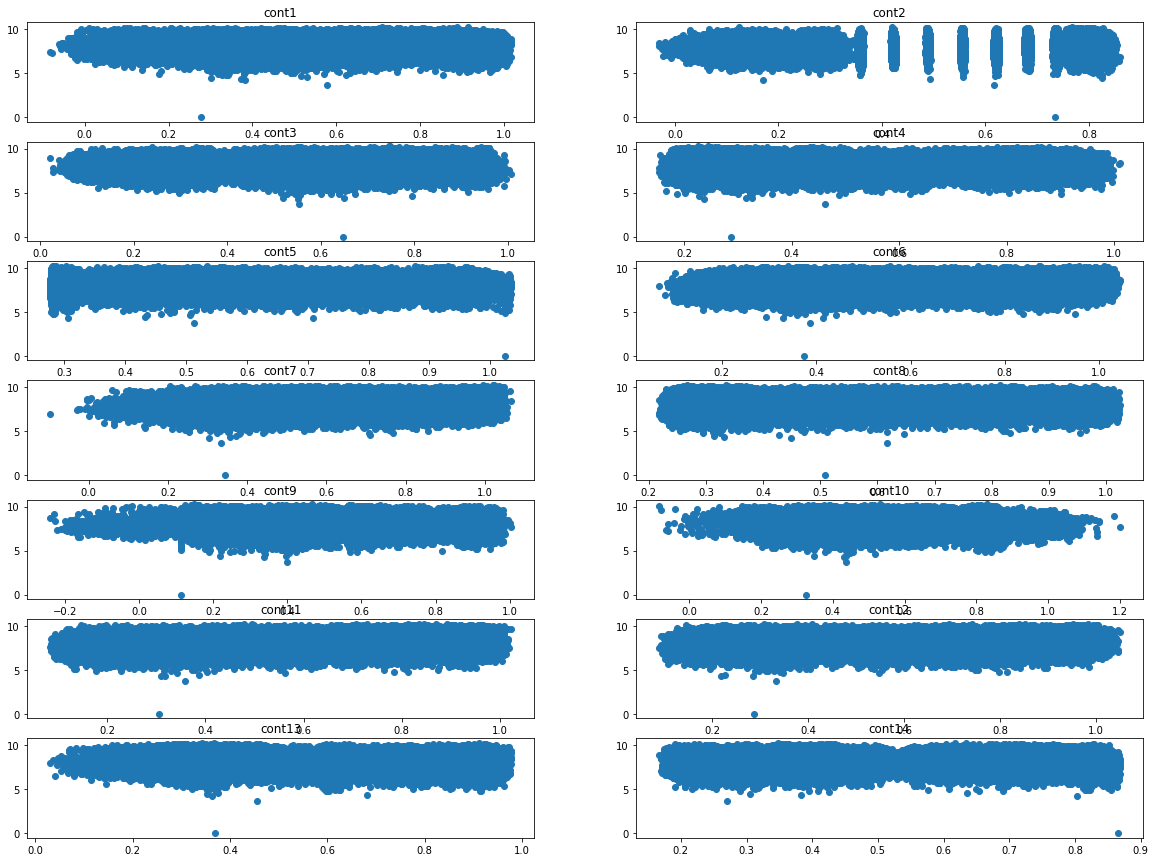

In [92]:
fig, axs = plt.subplots(7, 2, figsize=(20, 15))
k=0
for i in range(7):
    for j in range(2):
        col_name = numerical[k]
        k=k+1
        x_i = data[col_name]
        axs[i][j].scatter(x_i, y)
        axs[i][j].set_title(col_name)

Выведем корреляцию данных:

In [93]:
data.corr(method='pearson')

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,1.000000,-0.001454,0.000574,0.001609,0.002131,0.001959,-0.001971,-0.000155,0.002112,0.000030,-0.001652,-0.000484,-0.002075,-0.000577,0.001940,0.001347
cont1,-0.001454,1.000000,-0.080170,-0.419712,0.273705,-0.059012,0.698556,0.341478,0.373340,0.794003,0.725040,0.565717,0.600041,0.570382,0.067294,-0.032994
cont2,0.000574,-0.080170,1.000000,0.334487,-0.005533,0.150737,0.023692,0.116222,0.081049,-0.046769,0.035101,0.126024,0.092642,0.017383,0.023972,0.067102
cont3,0.001609,-0.419712,0.334487,1.000000,-0.329131,0.060931,-0.300509,0.106904,-0.309783,-0.406743,-0.289756,-0.075415,-0.103735,-0.386521,-0.065457,0.058936
cont4,0.002131,0.273705,-0.005533,-0.329131,1.000000,0.123526,0.152752,-0.077045,0.324784,0.261927,0.204139,0.063961,0.073291,0.155226,0.054703,0.005522
cont5,0.001959,-0.059012,0.150737,0.060931,0.123526,1.000000,-0.179084,-0.241272,0.010438,-0.071764,-0.102531,-0.222244,-0.192571,-0.140272,0.040552,-0.005358
cont6,-0.001971,0.698556,0.023692,-0.300509,0.152752,-0.179084,1.000000,0.541975,0.415008,0.716613,0.770628,0.737495,0.757105,0.783604,0.067007,0.027955
cont7,-0.000155,0.341478,0.116222,0.106904,-0.077045,-0.241272,0.541975,1.000000,0.150403,0.341759,0.465418,0.672188,0.657310,0.322415,-0.037135,0.067234
cont8,0.002112,0.373340,0.081049,-0.309783,0.324784,0.010438,0.415008,0.150403,1.000000,0.429986,0.362336,0.296598,0.323042,0.475072,0.100645,0.014698
cont9,0.000030,0.794003,-0.046769,-0.406743,0.261927,-0.071764,0.716613,0.341759,0.429986,1.000000,0.725053,0.575095,0.605091,0.628391,0.081992,-0.013029


Как видно, некоторые признаки сильно скоррелированы между собой

In [94]:
similar = ['cont6', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']

# Дропаем сильно коррелирующие признаки

In [109]:
df = data.drop(similar, axis=1)
X = df.iloc[:, 1:-1]
y = df['target']

# Test data

In [116]:
data = pd.read_csv("drive/MyDrive/test.csv")
X_ = data.iloc[:, 1:]

Будем пробовать различные методы

# Линейная регрессия

In [97]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate

## Lasso

In [98]:
lasso = linear_model.Lasso()
scores = cross_validate(lasso, X, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
# print(sorted(scores.keys()))
print('rmse: ', end='')
print(np.sqrt(scores['test_neg_mean_squared_error'].mean()*(-1)))
print('r2: ', end='')
print(scores['test_r2'].mean())

rmse: 0.7330714075642303
r2: -1.3629261883441046e-05


## Ridge

In [99]:
 ridge = linear_model.Ridge()
 scores1 = cross_validate(ridge, X, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
# print(sorted(scores.keys()))
print('rmse: ', end='')
print(np.sqrt(scores1['test_neg_mean_squared_error'].mean()*(-1)))
print('r2: ', end='')
print(scores1['test_r2'].mean())

rmse: 0.726238924826081
r2: 0.018541750919665523


## Elasctic Net

In [100]:
 elastic = linear_model.ElasticNet()
 scores1 = cross_validate(elastic, X, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
# print(sorted(scores.keys()))
print('rmse: ', end='')
print(np.sqrt(scores1['test_neg_mean_squared_error'].mean()*(-1)))
print('r2: ', end='')
print(scores1['test_r2'].mean())

rmse: 0.7330714075642303
r2: -1.3629261883441046e-05


Как мы видим, для lasso и Elastic Net коэффициент детерминации отрицателен.
Ridge работает лучше. Попробем другие методы

# xgboost

In [101]:
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
scores = cross_validate(xgboost.XGBRegressor(n_estimators=250, n_jobs=-1), X, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

[09:16:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:21:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
np.sqrt(scores['test_neg_mean_squared_error'].mean()*(-1))

0.7063429931776894

In [ ]:
scores['test_r2'].mean()

0.07157799110433902

Как мы видим xgboost работает лучше линйеной регрессии. Теперь проверим как работает другая модель бустинга

In [ ]:
params = {'n_estimators': [1000, 2000, 4000], 'learning_rate':[0.001, 0.01], 'reg_lambda': [0.03, 0.003],  'max_depth':[10, 15]}
reg = GridSearchCV(xgboost.XGBRegressor(random_state=241, verbosity=2), params, cv=5)
reg.fit(X, y)

[15:42:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 0 pruned nodes, max_depth=10
[15:42:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 0 pruned nodes, max_depth=10
[15:42:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 792 extra nodes, 0 pruned nodes, max_depth=10
[15:42:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=10
[15:42:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=10
[15:42:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 0 pruned nodes, max_depth=10
[15:42:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 77

n_esimators = 4000, learning_rate = 0.001, reg_lambda (l2) = 0.003, max_depth = 15

In [ ]:
ans = reg.predict(X_)

# сatboost


In [6]:
!pip3 install catboost

     |████████████████████████████████| 65.8MB 63kB/s 


In [102]:
from catboost import CatBoostRegressor
from catboost import Pool, cv

In [7]:
cat = CatBoostRegressor()

In [8]:
params = {"iterations": 100,
          "depth": 2,
          "loss_function": "RMSE",
          "verbose": False}
cv_dataset = Pool(data=X,
                  label=y)
scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [15]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = cat.grid_search(grid, X=X, y=y, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.7083406815
bestIteration = 999

0:	loss: 0.7083407	best: 0.7083407 (0)	total: 2.98s	remaining: 1m 26s

bestTest = 0.7060834979
bestIteration = 816

1:	loss: 0.7060835	best: 0.7060835 (1)	total: 6.19s	remaining: 1m 26s

bestTest = 0.708128422
bestIteration = 999

2:	loss: 0.7081284	best: 0.7060835 (1)	total: 9.61s	remaining: 1m 26s

bestTest = 0.706021499
bestIteration = 973

3:	loss: 0.7060215	best: 0.7060215 (3)	total: 12.6s	remaining: 1m 22s

bestTest = 0.7084991515
bestIteration = 999

4:	loss: 0.7084992	best: 0.7060215 (3)	total: 16.4s	remaining: 1m 22s

bestTest = 0.7064442825
bestIteration = 895

5:	loss: 0.7064443	best: 0.7060215 (3)	total: 19.9s	remaining: 1m 19s

bestTest = 0.7084099301
bestIteration = 999

6:	loss: 0.7084099	best: 0.7060215 (3)	total: 22.9s	remaining: 1m 15s

bestTest = 0.7062903364
bestIteration = 975

7:	loss: 0.7062903	best: 0.7060215 (3)	total: 26.2s	remaining: 1m 11s

bestTest = 0.7084895255
bestIteration = 999

8:	loss: 0.7084895	best: 0.7

In [ ]:
scores = cross_validate(CatBoostRegressor(n_estimators=250), X, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

Learning rate set to 0.296923
0:	learn: 0.7271990	total: 113ms	remaining: 28.1s
1:	learn: 0.7242014	total: 167ms	remaining: 20.7s
2:	learn: 0.7222602	total: 220ms	remaining: 18.1s
3:	learn: 0.7209174	total: 263ms	remaining: 16.2s
4:	learn: 0.7193529	total: 305ms	remaining: 15s
5:	learn: 0.7181869	total: 355ms	remaining: 14.4s
6:	learn: 0.7172623	total: 396ms	remaining: 13.8s
7:	learn: 0.7165063	total: 440ms	remaining: 13.3s
8:	learn: 0.7155066	total: 485ms	remaining: 13s
9:	learn: 0.7147229	total: 531ms	remaining: 12.7s
10:	learn: 0.7139731	total: 584ms	remaining: 12.7s
11:	learn: 0.7134617	total: 625ms	remaining: 12.4s
12:	learn: 0.7128670	total: 670ms	remaining: 12.2s
13:	learn: 0.7124197	total: 730ms	remaining: 12.3s
14:	learn: 0.7120731	total: 770ms	remaining: 12.1s
15:	learn: 0.7116031	total: 816ms	remaining: 11.9s
16:	learn: 0.7112122	total: 863ms	remaining: 11.8s
17:	learn: 0.7107951	total: 907ms	remaining: 11.7s
18:	learn: 0.7104315	total: 949ms	remaining: 11.5s
19:	learn: 0.71

In [ ]:
np.sqrt(scores['test_neg_mean_squared_error'].mean()*(-1))

0.7010251462247984

In [ ]:
scores['test_r2'].mean()

0.0855055582301262

In [111]:
catboost_model = CatBoostRegressor(n_estimators=4000)
catboost_model.fit(X, y)
ans = catboost_model.predict(X_)

Learning rate set to 0.037563
0:	learn: 0.7323965	total: 16.6ms	remaining: 1m 6s
1:	learn: 0.7317759	total: 33.2ms	remaining: 1m 6s
2:	learn: 0.7311962	total: 46.2ms	remaining: 1m 1s
3:	learn: 0.7306448	total: 62.2ms	remaining: 1m 2s
4:	learn: 0.7301169	total: 75ms	remaining: 59.9s
5:	learn: 0.7296009	total: 89ms	remaining: 59.2s
6:	learn: 0.7291548	total: 102ms	remaining: 58s
7:	learn: 0.7287338	total: 119ms	remaining: 59.3s
8:	learn: 0.7283552	total: 138ms	remaining: 1m 1s
9:	learn: 0.7280010	total: 155ms	remaining: 1m 1s
10:	learn: 0.7276485	total: 172ms	remaining: 1m 2s
11:	learn: 0.7273081	total: 188ms	remaining: 1m 2s
12:	learn: 0.7270241	total: 204ms	remaining: 1m 2s
13:	learn: 0.7267326	total: 224ms	remaining: 1m 3s
14:	learn: 0.7264576	total: 240ms	remaining: 1m 3s
15:	learn: 0.7262147	total: 254ms	remaining: 1m 3s
16:	learn: 0.7259832	total: 269ms	remaining: 1m 3s
17:	learn: 0.7257725	total: 284ms	remaining: 1m 2s
18:	learn: 0.7255487	total: 300ms	remaining: 1m 2s
19:	learn: 

162:	learn: 0.7164455	total: 2.5s	remaining: 58.8s
163:	learn: 0.7164206	total: 2.51s	remaining: 58.8s
164:	learn: 0.7163918	total: 2.53s	remaining: 58.8s
165:	learn: 0.7163678	total: 2.55s	remaining: 58.8s
166:	learn: 0.7163396	total: 2.56s	remaining: 58.9s
167:	learn: 0.7163196	total: 2.58s	remaining: 58.9s
168:	learn: 0.7162953	total: 2.6s	remaining: 58.9s
169:	learn: 0.7162637	total: 2.61s	remaining: 58.9s
170:	learn: 0.7162457	total: 2.63s	remaining: 58.9s
171:	learn: 0.7162216	total: 2.64s	remaining: 58.8s
172:	learn: 0.7162036	total: 2.65s	remaining: 58.6s
173:	learn: 0.7161688	total: 2.66s	remaining: 58.6s
174:	learn: 0.7161501	total: 2.67s	remaining: 58.5s
175:	learn: 0.7161205	total: 2.69s	remaining: 58.4s
176:	learn: 0.7160933	total: 2.7s	remaining: 58.3s
177:	learn: 0.7160673	total: 2.71s	remaining: 58.3s
178:	learn: 0.7160323	total: 2.73s	remaining: 58.2s
179:	learn: 0.7160105	total: 2.74s	remaining: 58.1s
180:	learn: 0.7159867	total: 2.75s	remaining: 58s
181:	learn: 0.715

324:	learn: 0.7131415	total: 5.18s	remaining: 58.6s
325:	learn: 0.7131217	total: 5.2s	remaining: 58.5s
326:	learn: 0.7131132	total: 5.21s	remaining: 58.5s
327:	learn: 0.7130972	total: 5.22s	remaining: 58.5s
328:	learn: 0.7130782	total: 5.24s	remaining: 58.5s
329:	learn: 0.7130620	total: 5.25s	remaining: 58.5s
330:	learn: 0.7130443	total: 5.27s	remaining: 58.4s
331:	learn: 0.7130267	total: 5.29s	remaining: 58.4s
332:	learn: 0.7130074	total: 5.3s	remaining: 58.3s
333:	learn: 0.7129854	total: 5.31s	remaining: 58.3s
334:	learn: 0.7129720	total: 5.33s	remaining: 58.3s
335:	learn: 0.7129534	total: 5.34s	remaining: 58.2s
336:	learn: 0.7129392	total: 5.36s	remaining: 58.2s
337:	learn: 0.7129206	total: 5.37s	remaining: 58.2s
338:	learn: 0.7129019	total: 5.39s	remaining: 58.2s
339:	learn: 0.7128866	total: 5.4s	remaining: 58.2s
340:	learn: 0.7128652	total: 5.42s	remaining: 58.2s
341:	learn: 0.7128486	total: 5.43s	remaining: 58.1s
342:	learn: 0.7128302	total: 5.45s	remaining: 58.1s
343:	learn: 0.7

497:	learn: 0.7105352	total: 8.53s	remaining: 60s
498:	learn: 0.7105250	total: 8.54s	remaining: 59.9s
499:	learn: 0.7105132	total: 8.56s	remaining: 59.9s
500:	learn: 0.7104998	total: 8.57s	remaining: 59.9s
501:	learn: 0.7104845	total: 8.59s	remaining: 59.8s
502:	learn: 0.7104702	total: 8.61s	remaining: 59.8s
503:	learn: 0.7104535	total: 8.62s	remaining: 59.8s
504:	learn: 0.7104400	total: 8.64s	remaining: 59.8s
505:	learn: 0.7104226	total: 8.66s	remaining: 59.8s
506:	learn: 0.7104108	total: 8.67s	remaining: 59.8s
507:	learn: 0.7103970	total: 8.69s	remaining: 59.8s
508:	learn: 0.7103848	total: 8.7s	remaining: 59.7s
509:	learn: 0.7103703	total: 8.72s	remaining: 59.7s
510:	learn: 0.7103593	total: 8.73s	remaining: 59.6s
511:	learn: 0.7103437	total: 8.75s	remaining: 59.6s
512:	learn: 0.7103341	total: 8.77s	remaining: 59.6s
513:	learn: 0.7103244	total: 8.78s	remaining: 59.6s
514:	learn: 0.7103121	total: 8.8s	remaining: 59.5s
515:	learn: 0.7103015	total: 8.81s	remaining: 59.5s
516:	learn: 0.71

669:	learn: 0.7084703	total: 11.2s	remaining: 55.6s
670:	learn: 0.7084597	total: 11.2s	remaining: 55.6s
671:	learn: 0.7084507	total: 11.2s	remaining: 55.6s
672:	learn: 0.7084421	total: 11.2s	remaining: 55.5s
673:	learn: 0.7084347	total: 11.3s	remaining: 55.5s
674:	learn: 0.7084258	total: 11.3s	remaining: 55.5s
675:	learn: 0.7084125	total: 11.3s	remaining: 55.5s
676:	learn: 0.7083990	total: 11.3s	remaining: 55.5s
677:	learn: 0.7083857	total: 11.3s	remaining: 55.4s
678:	learn: 0.7083758	total: 11.3s	remaining: 55.4s
679:	learn: 0.7083638	total: 11.3s	remaining: 55.4s
680:	learn: 0.7083516	total: 11.4s	remaining: 55.3s
681:	learn: 0.7083418	total: 11.4s	remaining: 55.3s
682:	learn: 0.7083311	total: 11.4s	remaining: 55.3s
683:	learn: 0.7083206	total: 11.4s	remaining: 55.3s
684:	learn: 0.7083096	total: 11.4s	remaining: 55.3s
685:	learn: 0.7082972	total: 11.4s	remaining: 55.2s
686:	learn: 0.7082888	total: 11.4s	remaining: 55.2s
687:	learn: 0.7082775	total: 11.5s	remaining: 55.2s
688:	learn: 

830:	learn: 0.7067987	total: 13.6s	remaining: 52s
831:	learn: 0.7067862	total: 13.7s	remaining: 52s
832:	learn: 0.7067768	total: 13.7s	remaining: 52s
833:	learn: 0.7067703	total: 13.7s	remaining: 52s
834:	learn: 0.7067590	total: 13.7s	remaining: 52s
835:	learn: 0.7067505	total: 13.7s	remaining: 52s
836:	learn: 0.7067447	total: 13.7s	remaining: 51.9s
837:	learn: 0.7067360	total: 13.8s	remaining: 51.9s
838:	learn: 0.7067236	total: 13.8s	remaining: 51.9s
839:	learn: 0.7067137	total: 13.8s	remaining: 51.9s
840:	learn: 0.7067025	total: 13.8s	remaining: 51.9s
841:	learn: 0.7066923	total: 13.8s	remaining: 51.8s
842:	learn: 0.7066865	total: 13.8s	remaining: 51.8s
843:	learn: 0.7066795	total: 13.8s	remaining: 51.8s
844:	learn: 0.7066705	total: 13.9s	remaining: 51.7s
845:	learn: 0.7066600	total: 13.9s	remaining: 51.7s
846:	learn: 0.7066490	total: 13.9s	remaining: 51.7s
847:	learn: 0.7066396	total: 13.9s	remaining: 51.7s
848:	learn: 0.7066321	total: 13.9s	remaining: 51.6s
849:	learn: 0.7066250	to

1001:	learn: 0.7052479	total: 16.3s	remaining: 48.9s
1002:	learn: 0.7052393	total: 16.3s	remaining: 48.8s
1003:	learn: 0.7052315	total: 16.4s	remaining: 48.8s
1004:	learn: 0.7052229	total: 16.4s	remaining: 48.8s
1005:	learn: 0.7052146	total: 16.4s	remaining: 48.8s
1006:	learn: 0.7052052	total: 16.4s	remaining: 48.8s
1007:	learn: 0.7051946	total: 16.4s	remaining: 48.8s
1008:	learn: 0.7051836	total: 16.5s	remaining: 48.8s
1009:	learn: 0.7051750	total: 16.5s	remaining: 48.8s
1010:	learn: 0.7051668	total: 16.5s	remaining: 48.8s
1011:	learn: 0.7051579	total: 16.5s	remaining: 48.8s
1012:	learn: 0.7051506	total: 16.5s	remaining: 48.8s
1013:	learn: 0.7051420	total: 16.6s	remaining: 48.8s
1014:	learn: 0.7051318	total: 16.6s	remaining: 48.8s
1015:	learn: 0.7051238	total: 16.6s	remaining: 48.8s
1016:	learn: 0.7051152	total: 16.6s	remaining: 48.8s
1017:	learn: 0.7051036	total: 16.7s	remaining: 48.8s
1018:	learn: 0.7050939	total: 16.7s	remaining: 48.8s
1019:	learn: 0.7050867	total: 16.7s	remaining:

1168:	learn: 0.7038571	total: 19s	remaining: 46.1s
1169:	learn: 0.7038476	total: 19.1s	remaining: 46.1s
1170:	learn: 0.7038394	total: 19.1s	remaining: 46.1s
1171:	learn: 0.7038314	total: 19.1s	remaining: 46s
1172:	learn: 0.7038222	total: 19.1s	remaining: 46s
1173:	learn: 0.7038160	total: 19.1s	remaining: 46s
1174:	learn: 0.7038065	total: 19.1s	remaining: 46s
1175:	learn: 0.7037977	total: 19.1s	remaining: 46s
1176:	learn: 0.7037900	total: 19.2s	remaining: 46s
1177:	learn: 0.7037819	total: 19.2s	remaining: 45.9s
1178:	learn: 0.7037732	total: 19.2s	remaining: 45.9s
1179:	learn: 0.7037651	total: 19.2s	remaining: 45.9s
1180:	learn: 0.7037549	total: 19.2s	remaining: 45.9s
1181:	learn: 0.7037475	total: 19.2s	remaining: 45.8s
1182:	learn: 0.7037399	total: 19.2s	remaining: 45.8s
1183:	learn: 0.7037317	total: 19.3s	remaining: 45.8s
1184:	learn: 0.7037237	total: 19.3s	remaining: 45.8s
1185:	learn: 0.7037150	total: 19.3s	remaining: 45.8s
1186:	learn: 0.7037048	total: 19.3s	remaining: 45.7s
1187:	l

1334:	learn: 0.7025762	total: 21.5s	remaining: 42.9s
1335:	learn: 0.7025682	total: 21.5s	remaining: 42.9s
1336:	learn: 0.7025626	total: 21.5s	remaining: 42.9s
1337:	learn: 0.7025557	total: 21.6s	remaining: 42.9s
1338:	learn: 0.7025474	total: 21.6s	remaining: 42.9s
1339:	learn: 0.7025411	total: 21.6s	remaining: 42.9s
1340:	learn: 0.7025348	total: 21.6s	remaining: 42.8s
1341:	learn: 0.7025266	total: 21.6s	remaining: 42.8s
1342:	learn: 0.7025187	total: 21.6s	remaining: 42.8s
1343:	learn: 0.7025118	total: 21.7s	remaining: 42.8s
1344:	learn: 0.7025040	total: 21.7s	remaining: 42.8s
1345:	learn: 0.7024962	total: 21.7s	remaining: 42.8s
1346:	learn: 0.7024904	total: 21.7s	remaining: 42.7s
1347:	learn: 0.7024786	total: 21.7s	remaining: 42.7s
1348:	learn: 0.7024715	total: 21.7s	remaining: 42.7s
1349:	learn: 0.7024660	total: 21.7s	remaining: 42.7s
1350:	learn: 0.7024607	total: 21.8s	remaining: 42.7s
1351:	learn: 0.7024506	total: 21.8s	remaining: 42.6s
1352:	learn: 0.7024433	total: 21.8s	remaining:

1497:	learn: 0.7013872	total: 24s	remaining: 40s
1498:	learn: 0.7013815	total: 24s	remaining: 40s
1499:	learn: 0.7013732	total: 24s	remaining: 40s
1500:	learn: 0.7013637	total: 24s	remaining: 40s
1501:	learn: 0.7013585	total: 24s	remaining: 40s
1502:	learn: 0.7013504	total: 24.1s	remaining: 40s
1503:	learn: 0.7013440	total: 24.1s	remaining: 40s
1504:	learn: 0.7013368	total: 24.1s	remaining: 39.9s
1505:	learn: 0.7013300	total: 24.1s	remaining: 39.9s
1506:	learn: 0.7013243	total: 24.1s	remaining: 39.9s
1507:	learn: 0.7013168	total: 24.1s	remaining: 39.9s
1508:	learn: 0.7013094	total: 24.1s	remaining: 39.9s
1509:	learn: 0.7013012	total: 24.2s	remaining: 39.8s
1510:	learn: 0.7012930	total: 24.2s	remaining: 39.8s
1511:	learn: 0.7012869	total: 24.2s	remaining: 39.8s
1512:	learn: 0.7012819	total: 24.2s	remaining: 39.8s
1513:	learn: 0.7012734	total: 24.2s	remaining: 39.8s
1514:	learn: 0.7012660	total: 24.2s	remaining: 39.8s
1515:	learn: 0.7012622	total: 24.3s	remaining: 39.7s
1516:	learn: 0.70

1655:	learn: 0.7003269	total: 26.4s	remaining: 37.4s
1656:	learn: 0.7003202	total: 26.4s	remaining: 37.4s
1657:	learn: 0.7003151	total: 26.5s	remaining: 37.4s
1658:	learn: 0.7003087	total: 26.5s	remaining: 37.4s
1659:	learn: 0.7003029	total: 26.5s	remaining: 37.3s
1660:	learn: 0.7002964	total: 26.5s	remaining: 37.3s
1661:	learn: 0.7002908	total: 26.5s	remaining: 37.3s
1662:	learn: 0.7002844	total: 26.5s	remaining: 37.3s
1663:	learn: 0.7002755	total: 26.6s	remaining: 37.3s
1664:	learn: 0.7002684	total: 26.6s	remaining: 37.3s
1665:	learn: 0.7002621	total: 26.6s	remaining: 37.3s
1666:	learn: 0.7002551	total: 26.6s	remaining: 37.2s
1667:	learn: 0.7002476	total: 26.6s	remaining: 37.2s
1668:	learn: 0.7002404	total: 26.6s	remaining: 37.2s
1669:	learn: 0.7002342	total: 26.6s	remaining: 37.2s
1670:	learn: 0.7002272	total: 26.7s	remaining: 37.2s
1671:	learn: 0.7002193	total: 26.7s	remaining: 37.2s
1672:	learn: 0.7002116	total: 26.7s	remaining: 37.1s
1673:	learn: 0.7002039	total: 26.7s	remaining:

1819:	learn: 0.6992498	total: 28.9s	remaining: 34.6s
1820:	learn: 0.6992446	total: 28.9s	remaining: 34.6s
1821:	learn: 0.6992373	total: 28.9s	remaining: 34.6s
1822:	learn: 0.6992323	total: 28.9s	remaining: 34.6s
1823:	learn: 0.6992233	total: 29s	remaining: 34.6s
1824:	learn: 0.6992165	total: 29s	remaining: 34.5s
1825:	learn: 0.6992094	total: 29s	remaining: 34.5s
1826:	learn: 0.6992056	total: 29s	remaining: 34.5s
1827:	learn: 0.6991991	total: 29s	remaining: 34.5s
1828:	learn: 0.6991919	total: 29s	remaining: 34.5s
1829:	learn: 0.6991839	total: 29.1s	remaining: 34.5s
1830:	learn: 0.6991774	total: 29.1s	remaining: 34.4s
1831:	learn: 0.6991712	total: 29.1s	remaining: 34.4s
1832:	learn: 0.6991627	total: 29.1s	remaining: 34.4s
1833:	learn: 0.6991568	total: 29.1s	remaining: 34.4s
1834:	learn: 0.6991519	total: 29.1s	remaining: 34.4s
1835:	learn: 0.6991453	total: 29.1s	remaining: 34.3s
1836:	learn: 0.6991396	total: 29.2s	remaining: 34.3s
1837:	learn: 0.6991340	total: 29.2s	remaining: 34.3s
1838:

1982:	learn: 0.6982274	total: 31.6s	remaining: 32.1s
1983:	learn: 0.6982195	total: 31.6s	remaining: 32.1s
1984:	learn: 0.6982114	total: 31.6s	remaining: 32.1s
1985:	learn: 0.6982066	total: 31.6s	remaining: 32.1s
1986:	learn: 0.6982000	total: 31.6s	remaining: 32s
1987:	learn: 0.6981935	total: 31.7s	remaining: 32s
1988:	learn: 0.6981863	total: 31.7s	remaining: 32s
1989:	learn: 0.6981791	total: 31.7s	remaining: 32s
1990:	learn: 0.6981732	total: 31.7s	remaining: 32s
1991:	learn: 0.6981662	total: 31.7s	remaining: 32s
1992:	learn: 0.6981603	total: 31.7s	remaining: 31.9s
1993:	learn: 0.6981543	total: 31.7s	remaining: 31.9s
1994:	learn: 0.6981477	total: 31.8s	remaining: 31.9s
1995:	learn: 0.6981415	total: 31.8s	remaining: 31.9s
1996:	learn: 0.6981351	total: 31.8s	remaining: 31.9s
1997:	learn: 0.6981306	total: 31.8s	remaining: 31.9s
1998:	learn: 0.6981234	total: 31.8s	remaining: 31.9s
1999:	learn: 0.6981195	total: 31.9s	remaining: 31.9s
2000:	learn: 0.6981138	total: 31.9s	remaining: 31.9s
2001:

2147:	learn: 0.6972228	total: 34.2s	remaining: 29.5s
2148:	learn: 0.6972194	total: 34.3s	remaining: 29.5s
2149:	learn: 0.6972119	total: 34.3s	remaining: 29.5s
2150:	learn: 0.6972048	total: 34.3s	remaining: 29.5s
2151:	learn: 0.6971982	total: 34.3s	remaining: 29.5s
2152:	learn: 0.6971932	total: 34.3s	remaining: 29.4s
2153:	learn: 0.6971884	total: 34.3s	remaining: 29.4s
2154:	learn: 0.6971837	total: 34.4s	remaining: 29.4s
2155:	learn: 0.6971763	total: 34.4s	remaining: 29.4s
2156:	learn: 0.6971682	total: 34.4s	remaining: 29.4s
2157:	learn: 0.6971612	total: 34.4s	remaining: 29.4s
2158:	learn: 0.6971558	total: 34.4s	remaining: 29.3s
2159:	learn: 0.6971512	total: 34.4s	remaining: 29.3s
2160:	learn: 0.6971457	total: 34.4s	remaining: 29.3s
2161:	learn: 0.6971412	total: 34.5s	remaining: 29.3s
2162:	learn: 0.6971357	total: 34.5s	remaining: 29.3s
2163:	learn: 0.6971278	total: 34.5s	remaining: 29.3s
2164:	learn: 0.6971229	total: 34.5s	remaining: 29.2s
2165:	learn: 0.6971186	total: 34.5s	remaining:

2306:	learn: 0.6963171	total: 36.9s	remaining: 27.1s
2307:	learn: 0.6963107	total: 36.9s	remaining: 27.1s
2308:	learn: 0.6963029	total: 36.9s	remaining: 27.1s
2309:	learn: 0.6962976	total: 37s	remaining: 27s
2310:	learn: 0.6962905	total: 37s	remaining: 27s
2311:	learn: 0.6962841	total: 37s	remaining: 27s
2312:	learn: 0.6962802	total: 37s	remaining: 27s
2313:	learn: 0.6962718	total: 37s	remaining: 27s
2314:	learn: 0.6962667	total: 37s	remaining: 27s
2315:	learn: 0.6962621	total: 37.1s	remaining: 26.9s
2316:	learn: 0.6962539	total: 37.1s	remaining: 26.9s
2317:	learn: 0.6962492	total: 37.1s	remaining: 26.9s
2318:	learn: 0.6962455	total: 37.1s	remaining: 26.9s
2319:	learn: 0.6962392	total: 37.1s	remaining: 26.9s
2320:	learn: 0.6962343	total: 37.1s	remaining: 26.9s
2321:	learn: 0.6962288	total: 37.1s	remaining: 26.8s
2322:	learn: 0.6962251	total: 37.2s	remaining: 26.8s
2323:	learn: 0.6962212	total: 37.2s	remaining: 26.8s
2324:	learn: 0.6962177	total: 37.2s	remaining: 26.8s
2325:	learn: 0.69

2473:	learn: 0.6953787	total: 39.8s	remaining: 24.5s
2474:	learn: 0.6953715	total: 39.8s	remaining: 24.5s
2475:	learn: 0.6953647	total: 39.8s	remaining: 24.5s
2476:	learn: 0.6953586	total: 39.8s	remaining: 24.5s
2477:	learn: 0.6953514	total: 39.8s	remaining: 24.5s
2478:	learn: 0.6953459	total: 39.9s	remaining: 24.5s
2479:	learn: 0.6953418	total: 39.9s	remaining: 24.4s
2480:	learn: 0.6953351	total: 39.9s	remaining: 24.4s
2481:	learn: 0.6953304	total: 39.9s	remaining: 24.4s
2482:	learn: 0.6953253	total: 39.9s	remaining: 24.4s
2483:	learn: 0.6953176	total: 39.9s	remaining: 24.4s
2484:	learn: 0.6953134	total: 40s	remaining: 24.4s
2485:	learn: 0.6953077	total: 40s	remaining: 24.3s
2486:	learn: 0.6952993	total: 40s	remaining: 24.3s
2487:	learn: 0.6952930	total: 40s	remaining: 24.3s
2488:	learn: 0.6952875	total: 40s	remaining: 24.3s
2489:	learn: 0.6952796	total: 40s	remaining: 24.3s
2490:	learn: 0.6952733	total: 40s	remaining: 24.3s
2491:	learn: 0.6952685	total: 40.1s	remaining: 24.2s
2492:	l

2636:	learn: 0.6944814	total: 42.2s	remaining: 21.8s
2637:	learn: 0.6944756	total: 42.3s	remaining: 21.8s
2638:	learn: 0.6944705	total: 42.3s	remaining: 21.8s
2639:	learn: 0.6944654	total: 42.3s	remaining: 21.8s
2640:	learn: 0.6944602	total: 42.3s	remaining: 21.8s
2641:	learn: 0.6944559	total: 42.3s	remaining: 21.8s
2642:	learn: 0.6944495	total: 42.3s	remaining: 21.7s
2643:	learn: 0.6944425	total: 42.4s	remaining: 21.7s
2644:	learn: 0.6944389	total: 42.4s	remaining: 21.7s
2645:	learn: 0.6944343	total: 42.4s	remaining: 21.7s
2646:	learn: 0.6944286	total: 42.4s	remaining: 21.7s
2647:	learn: 0.6944225	total: 42.4s	remaining: 21.7s
2648:	learn: 0.6944166	total: 42.4s	remaining: 21.6s
2649:	learn: 0.6944105	total: 42.4s	remaining: 21.6s
2650:	learn: 0.6944044	total: 42.5s	remaining: 21.6s
2651:	learn: 0.6943976	total: 42.5s	remaining: 21.6s
2652:	learn: 0.6943920	total: 42.5s	remaining: 21.6s
2653:	learn: 0.6943888	total: 42.5s	remaining: 21.6s
2654:	learn: 0.6943852	total: 42.5s	remaining:

2793:	learn: 0.6936405	total: 45s	remaining: 19.4s
2794:	learn: 0.6936372	total: 45s	remaining: 19.4s
2795:	learn: 0.6936343	total: 45s	remaining: 19.4s
2796:	learn: 0.6936300	total: 45s	remaining: 19.4s
2797:	learn: 0.6936231	total: 45.1s	remaining: 19.4s
2798:	learn: 0.6936182	total: 45.1s	remaining: 19.3s
2799:	learn: 0.6936141	total: 45.1s	remaining: 19.3s
2800:	learn: 0.6936079	total: 45.1s	remaining: 19.3s
2801:	learn: 0.6936027	total: 45.1s	remaining: 19.3s
2802:	learn: 0.6935967	total: 45.1s	remaining: 19.3s
2803:	learn: 0.6935903	total: 45.2s	remaining: 19.3s
2804:	learn: 0.6935849	total: 45.2s	remaining: 19.2s
2805:	learn: 0.6935804	total: 45.2s	remaining: 19.2s
2806:	learn: 0.6935748	total: 45.2s	remaining: 19.2s
2807:	learn: 0.6935699	total: 45.2s	remaining: 19.2s
2808:	learn: 0.6935640	total: 45.2s	remaining: 19.2s
2809:	learn: 0.6935591	total: 45.3s	remaining: 19.2s
2810:	learn: 0.6935532	total: 45.3s	remaining: 19.2s
2811:	learn: 0.6935483	total: 45.3s	remaining: 19.1s
2

2961:	learn: 0.6927503	total: 47.7s	remaining: 16.7s
2962:	learn: 0.6927452	total: 47.7s	remaining: 16.7s
2963:	learn: 0.6927403	total: 47.7s	remaining: 16.7s
2964:	learn: 0.6927364	total: 47.7s	remaining: 16.7s
2965:	learn: 0.6927338	total: 47.7s	remaining: 16.6s
2966:	learn: 0.6927280	total: 47.8s	remaining: 16.6s
2967:	learn: 0.6927233	total: 47.8s	remaining: 16.6s
2968:	learn: 0.6927173	total: 47.8s	remaining: 16.6s
2969:	learn: 0.6927120	total: 47.8s	remaining: 16.6s
2970:	learn: 0.6927063	total: 47.8s	remaining: 16.6s
2971:	learn: 0.6927019	total: 47.8s	remaining: 16.5s
2972:	learn: 0.6926979	total: 47.8s	remaining: 16.5s
2973:	learn: 0.6926927	total: 47.8s	remaining: 16.5s
2974:	learn: 0.6926858	total: 47.9s	remaining: 16.5s
2975:	learn: 0.6926804	total: 47.9s	remaining: 16.5s
2976:	learn: 0.6926747	total: 47.9s	remaining: 16.5s
2977:	learn: 0.6926704	total: 47.9s	remaining: 16.4s
2978:	learn: 0.6926675	total: 47.9s	remaining: 16.4s
2979:	learn: 0.6926631	total: 47.9s	remaining:

3129:	learn: 0.6918877	total: 50.2s	remaining: 13.9s
3130:	learn: 0.6918823	total: 50.2s	remaining: 13.9s
3131:	learn: 0.6918761	total: 50.2s	remaining: 13.9s
3132:	learn: 0.6918715	total: 50.2s	remaining: 13.9s
3133:	learn: 0.6918675	total: 50.2s	remaining: 13.9s
3134:	learn: 0.6918629	total: 50.3s	remaining: 13.9s
3135:	learn: 0.6918576	total: 50.3s	remaining: 13.8s
3136:	learn: 0.6918521	total: 50.3s	remaining: 13.8s
3137:	learn: 0.6918473	total: 50.3s	remaining: 13.8s
3138:	learn: 0.6918415	total: 50.3s	remaining: 13.8s
3139:	learn: 0.6918356	total: 50.3s	remaining: 13.8s
3140:	learn: 0.6918285	total: 50.3s	remaining: 13.8s
3141:	learn: 0.6918234	total: 50.4s	remaining: 13.8s
3142:	learn: 0.6918192	total: 50.4s	remaining: 13.7s
3143:	learn: 0.6918141	total: 50.4s	remaining: 13.7s
3144:	learn: 0.6918098	total: 50.4s	remaining: 13.7s
3145:	learn: 0.6918057	total: 50.4s	remaining: 13.7s
3146:	learn: 0.6918012	total: 50.4s	remaining: 13.7s
3147:	learn: 0.6917946	total: 50.4s	remaining:

3294:	learn: 0.6910702	total: 52.9s	remaining: 11.3s
3295:	learn: 0.6910664	total: 52.9s	remaining: 11.3s
3296:	learn: 0.6910615	total: 52.9s	remaining: 11.3s
3297:	learn: 0.6910551	total: 52.9s	remaining: 11.3s
3298:	learn: 0.6910490	total: 53s	remaining: 11.3s
3299:	learn: 0.6910431	total: 53s	remaining: 11.2s
3300:	learn: 0.6910396	total: 53s	remaining: 11.2s
3301:	learn: 0.6910350	total: 53s	remaining: 11.2s
3302:	learn: 0.6910317	total: 53s	remaining: 11.2s
3303:	learn: 0.6910253	total: 53.1s	remaining: 11.2s
3304:	learn: 0.6910196	total: 53.1s	remaining: 11.2s
3305:	learn: 0.6910132	total: 53.1s	remaining: 11.1s
3306:	learn: 0.6910066	total: 53.1s	remaining: 11.1s
3307:	learn: 0.6910024	total: 53.1s	remaining: 11.1s
3308:	learn: 0.6909984	total: 53.1s	remaining: 11.1s
3309:	learn: 0.6909933	total: 53.2s	remaining: 11.1s
3310:	learn: 0.6909887	total: 53.2s	remaining: 11.1s
3311:	learn: 0.6909866	total: 53.2s	remaining: 11.1s
3312:	learn: 0.6909824	total: 53.2s	remaining: 11s
3313:

3458:	learn: 0.6902625	total: 55.6s	remaining: 8.69s
3459:	learn: 0.6902566	total: 55.6s	remaining: 8.67s
3460:	learn: 0.6902530	total: 55.6s	remaining: 8.66s
3461:	learn: 0.6902491	total: 55.6s	remaining: 8.64s
3462:	learn: 0.6902437	total: 55.6s	remaining: 8.63s
3463:	learn: 0.6902392	total: 55.6s	remaining: 8.61s
3464:	learn: 0.6902312	total: 55.7s	remaining: 8.59s
3465:	learn: 0.6902274	total: 55.7s	remaining: 8.58s
3466:	learn: 0.6902226	total: 55.7s	remaining: 8.56s
3467:	learn: 0.6902155	total: 55.7s	remaining: 8.55s
3468:	learn: 0.6902094	total: 55.7s	remaining: 8.53s
3469:	learn: 0.6902039	total: 55.8s	remaining: 8.52s
3470:	learn: 0.6901990	total: 55.8s	remaining: 8.5s
3471:	learn: 0.6901956	total: 55.8s	remaining: 8.49s
3472:	learn: 0.6901921	total: 55.8s	remaining: 8.47s
3473:	learn: 0.6901872	total: 55.8s	remaining: 8.46s
3474:	learn: 0.6901838	total: 55.9s	remaining: 8.44s
3475:	learn: 0.6901804	total: 55.9s	remaining: 8.42s
3476:	learn: 0.6901752	total: 55.9s	remaining: 

3620:	learn: 0.6894336	total: 58.5s	remaining: 6.12s
3621:	learn: 0.6894301	total: 58.5s	remaining: 6.1s
3622:	learn: 0.6894251	total: 58.5s	remaining: 6.09s
3623:	learn: 0.6894206	total: 58.5s	remaining: 6.07s
3624:	learn: 0.6894162	total: 58.5s	remaining: 6.06s
3625:	learn: 0.6894126	total: 58.6s	remaining: 6.04s
3626:	learn: 0.6894070	total: 58.6s	remaining: 6.03s
3627:	learn: 0.6894019	total: 58.6s	remaining: 6.01s
3628:	learn: 0.6893955	total: 58.6s	remaining: 5.99s
3629:	learn: 0.6893906	total: 58.7s	remaining: 5.98s
3630:	learn: 0.6893866	total: 58.7s	remaining: 5.96s
3631:	learn: 0.6893822	total: 58.7s	remaining: 5.95s
3632:	learn: 0.6893746	total: 58.7s	remaining: 5.93s
3633:	learn: 0.6893716	total: 58.7s	remaining: 5.92s
3634:	learn: 0.6893656	total: 58.8s	remaining: 5.9s
3635:	learn: 0.6893601	total: 58.8s	remaining: 5.88s
3636:	learn: 0.6893542	total: 58.8s	remaining: 5.87s
3637:	learn: 0.6893499	total: 58.8s	remaining: 5.85s
3638:	learn: 0.6893453	total: 58.8s	remaining: 5

3785:	learn: 0.6886360	total: 1m 1s	remaining: 3.48s
3786:	learn: 0.6886309	total: 1m 1s	remaining: 3.47s
3787:	learn: 0.6886262	total: 1m 1s	remaining: 3.45s
3788:	learn: 0.6886200	total: 1m 1s	remaining: 3.43s
3789:	learn: 0.6886157	total: 1m 1s	remaining: 3.42s
3790:	learn: 0.6886104	total: 1m 1s	remaining: 3.4s
3791:	learn: 0.6886058	total: 1m 1s	remaining: 3.38s
3792:	learn: 0.6886014	total: 1m 1s	remaining: 3.37s
3793:	learn: 0.6885964	total: 1m 1s	remaining: 3.35s
3794:	learn: 0.6885911	total: 1m 1s	remaining: 3.34s
3795:	learn: 0.6885853	total: 1m 1s	remaining: 3.32s
3796:	learn: 0.6885795	total: 1m 1s	remaining: 3.3s
3797:	learn: 0.6885740	total: 1m 1s	remaining: 3.29s
3798:	learn: 0.6885679	total: 1m 1s	remaining: 3.27s
3799:	learn: 0.6885652	total: 1m 1s	remaining: 3.26s
3800:	learn: 0.6885606	total: 1m 1s	remaining: 3.24s
3801:	learn: 0.6885560	total: 1m 1s	remaining: 3.22s
3802:	learn: 0.6885515	total: 1m 1s	remaining: 3.21s
3803:	learn: 0.6885463	total: 1m 1s	remaining: 3

3941:	learn: 0.6878879	total: 1m 4s	remaining: 946ms
3942:	learn: 0.6878828	total: 1m 4s	remaining: 930ms
3943:	learn: 0.6878762	total: 1m 4s	remaining: 914ms
3944:	learn: 0.6878721	total: 1m 4s	remaining: 897ms
3945:	learn: 0.6878669	total: 1m 4s	remaining: 881ms
3946:	learn: 0.6878629	total: 1m 4s	remaining: 865ms
3947:	learn: 0.6878564	total: 1m 4s	remaining: 848ms
3948:	learn: 0.6878511	total: 1m 4s	remaining: 832ms
3949:	learn: 0.6878451	total: 1m 4s	remaining: 816ms
3950:	learn: 0.6878409	total: 1m 4s	remaining: 799ms
3951:	learn: 0.6878371	total: 1m 4s	remaining: 783ms
3952:	learn: 0.6878327	total: 1m 4s	remaining: 767ms
3953:	learn: 0.6878286	total: 1m 4s	remaining: 750ms
3954:	learn: 0.6878245	total: 1m 4s	remaining: 734ms
3955:	learn: 0.6878195	total: 1m 4s	remaining: 718ms
3956:	learn: 0.6878136	total: 1m 4s	remaining: 701ms
3957:	learn: 0.6878083	total: 1m 4s	remaining: 685ms
3958:	learn: 0.6878033	total: 1m 4s	remaining: 669ms
3959:	learn: 0.6877991	total: 1m 4s	remaining:

In [112]:
catboost_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 4000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.03756299987435341,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'MVS',
 'max_leave

# Нейронка с keras

In [117]:
from keras.regularizers import l2
import keras
from keras import layers
import keras
from keras.models import Sequential

In [118]:
coef = 1e-3
model = Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(coef), activity_regularizer=l2(coef)))
model.add(layers.Dense(64, activation='relu', bias_regularizer=l2(coef), kernel_regularizer=l2(coef), activity_regularizer=l2(coef)))
model.add(layers.Dense(32, activation='relu', bias_regularizer=l2(coef), kernel_regularizer=l2(coef), activity_regularizer=l2(coef)))
model.add(layers.Dense(1, activation='linear', bias_regularizer=l2(coef), kernel_regularizer=l2(coef), activity_regularizer=l2(coef)))

In [119]:
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [120]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
regressor = model.fit(X, y, epochs=20, callbacks=[callback], validation_split = 0.2)

Epoch 1/20
7500/7500 [==============================] - 5s 727us/step - loss: 0.8670 - val_loss: 0.6493
Epoch 2/20
7500/7500 [==============================] - 5s 685us/step - loss: 0.6409 - val_loss: 0.6117
Epoch 3/20
7500/7500 [==============================] - 5s 724us/step - loss: 0.6204 - val_loss: 0.6062
Epoch 4/20
7500/7500 [==============================] - 6s 755us/step - loss: 0.6157 - val_loss: 0.6026
Epoch 5/20
7500/7500 [==============================] - 6s 752us/step - loss: 0.6137 - val_loss: 0.6092
Epoch 6/20
7500/7500 [==============================] - 6s 771us/step - loss: 0.6121 - val_loss: 0.6001
Epoch 7/20
7500/7500 [==============================] - 6s 761us/step - loss: 0.6112 - val_loss: 0.6014
Epoch 8/20
7500/7500 [==============================] - 6s 796us/step - loss: 0.6104 - val_loss: 0.6004
Epoch 9/20
7500/7500 [==============================] - 5s 692us/step - loss: 0.6095 - val_loss: 0.6001
Epoch 10/20
7500/7500 [==============================] - 6s 812u

In [121]:
ans = model.predict(X_)
ans = ans.reshape(-1)
ans.shape

(200000,)

# Вывод результатов в файл

In [113]:
target = pd.DataFrame({'target': ans.tolist()})
output = pd.concat([data['id'], target], axis=1)

In [114]:
output.to_csv('answers.csv', index=False)

# Выводы

Lasso и Elastic Net показали себя хуже всего   
Ridge и полносвязная нейронная сеть отработали ощутимо лучше   
Еще чуть лучше отработал xgboost   
Но наилучшие результаты показал catboost c n_estimators=4000   